## Problem statement

Marketing and Design Team comes up with a New Packaging for a Dog Food Company. Everyone in the team agrees that it's Unique and they love it. But, since the packing is heavier the Product Manager is worried whether it would increase the Sales of the Product as well or, it would just create problems during delivery and distribution.

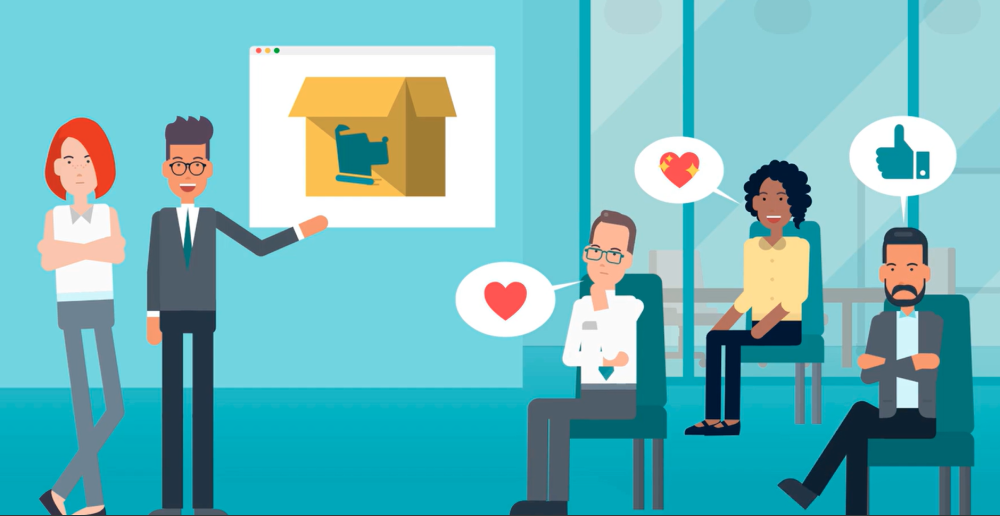

So, to find out the answer they opted for a Survey with 523 respondents/customers.

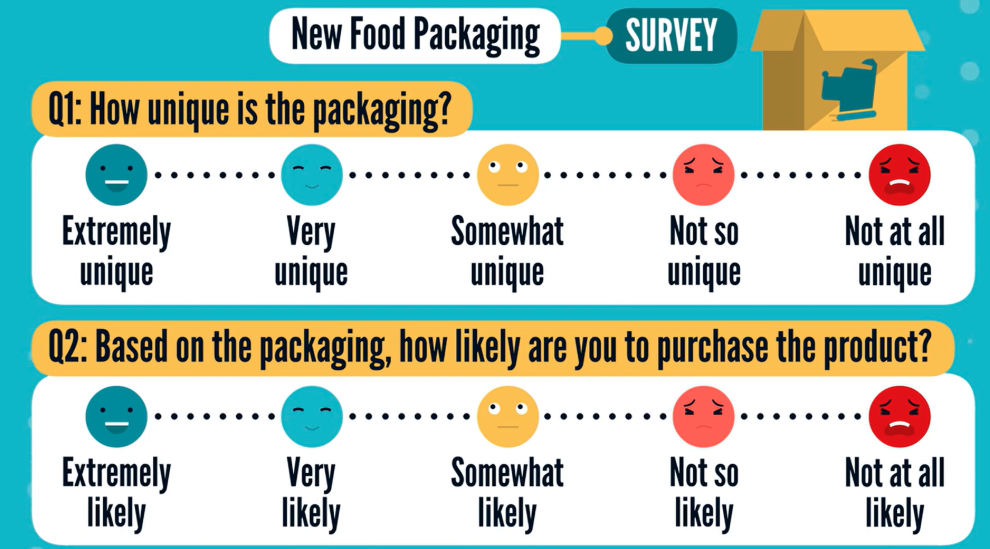

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_excel("Case 1 - Chi-square test of independence.xlsx")
df.head()

,Respondent,Uniqueness,Purchase Likelihood
0,1,Extremely unique,Extremely likely
1,2,Extremely unique,Extremely likely
2,3,Extremely unique,Extremely likely
3,4,Extremely unique,Extremely likely
4,5,Extremely unique,Extremely likely


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Respondent           523 non-null    int64 
 1   Uniqueness           523 non-null    object
 2   Purchase Likelihood  523 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.4+ KB


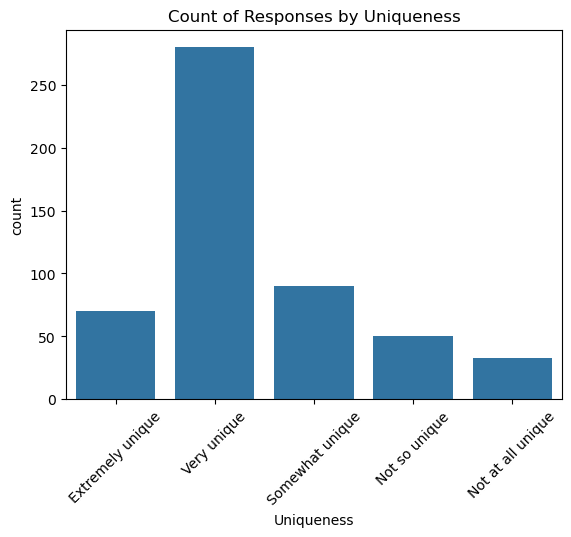

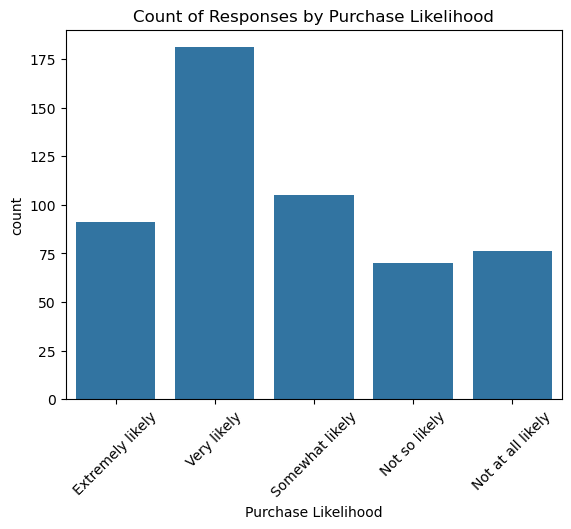

In [4]:
sns.countplot(x='Uniqueness', data=df)
plt.xticks(rotation=45)
plt.title("Count of Responses by Uniqueness")
plt.show()

sns.countplot(x='Purchase Likelihood', data=df)
plt.xticks(rotation=45)
plt.title("Count of Responses by Purchase Likelihood")
plt.show()

In [5]:
df_crosstab = pd.crosstab(df['Uniqueness'], df['Purchase Likelihood'])
df_crosstab

Purchase Likelihood,Extremely likely,Not at all likely,Not so likely,Somewhat likely,Very likely
Uniqueness,,,,,
Extremely unique,12,10,10,13,25
Not at all unique,5,11,5,4,8
Not so unique,7,9,10,8,16
Somewhat unique,15,16,15,16,28
Very unique,52,30,30,64,104


In [6]:
sorter = ["Extremely likely","Very likely","Somewhat likely","Not so likely","Not at all likely"]
sorter2 = ["Extremely unique","Very unique","Somewhat unique","Not so unique","Not at all unique"]

df_crosstab = df_crosstab.loc[sorter2]
df_crosstab = df_crosstab[sorter]
df_crosstab

Purchase Likelihood,Extremely likely,Very likely,Somewhat likely,Not so likely,Not at all likely
Uniqueness,,,,,
Extremely unique,12,25,13,10,10
Very unique,52,104,64,30,30
Somewhat unique,15,28,16,15,16
Not so unique,7,16,8,10,9
Not at all unique,5,8,4,5,11


In [7]:
df_proportions = pd.crosstab(df["Uniqueness"],df["Purchase Likelihood"],normalize=True)

df_proportions = df_proportions.loc[sorter2]
df_proportions = df_proportions[sorter]
 
df_proportions.style.background_gradient(cmap='Blues',vmin = 0,vmax = 0.2)

Purchase Likelihood,Extremely likely,Very likely,Somewhat likely,Not so likely,Not at all likely
Uniqueness,,,,,
Extremely unique,0.022945,0.047801,0.024857,0.019120,0.019120
Very unique,0.099426,0.198853,0.122371,0.057361,0.057361
Somewhat unique,0.028681,0.053537,0.030593,0.028681,0.030593
Not so unique,0.013384,0.030593,0.015296,0.019120,0.017208
Not at all unique,0.009560,0.015296,0.007648,0.009560,0.021033


In [8]:
df_crosstab.style.background_gradient(cmap='Blues', vmin=0, vmax=100)

Purchase Likelihood,Extremely likely,Very likely,Somewhat likely,Not so likely,Not at all likely
Uniqueness,,,,,
Extremely unique,12,25,13,10,10
Very unique,52,104,64,30,30
Somewhat unique,15,28,16,15,16
Not so unique,7,16,8,10,9
Not at all unique,5,8,4,5,11


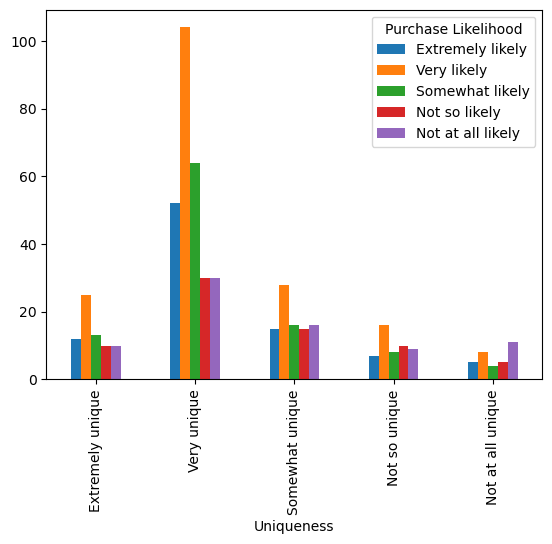

In [9]:
df_crosstab.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.show()

## Hypothesis Testing

### Step - 1: 
Our goal is to examine the claim that the uniqueness of the packaging affects the propensity of consumers to buy the product based on the packaging.Therefore, the null and alternative hypotheses can be formulated as follows:

- H0: Uniqueness is not associated with 'Purchase intent'
- H1: Uniqueness is associated with 'Purchase intent'

### Step - 2:
The significance level alpha is set to 0.05

### Step - 3: Choose Formula
Why Chi-Square Test?

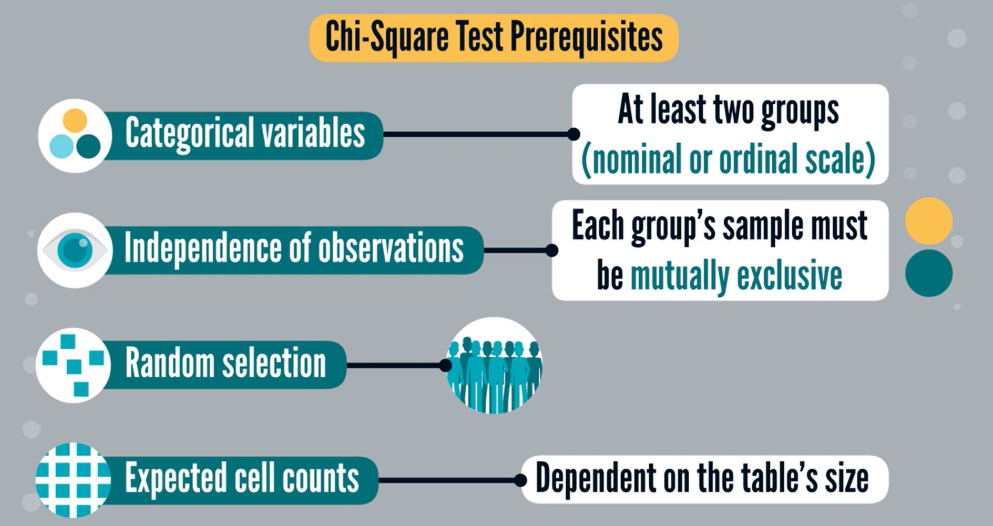

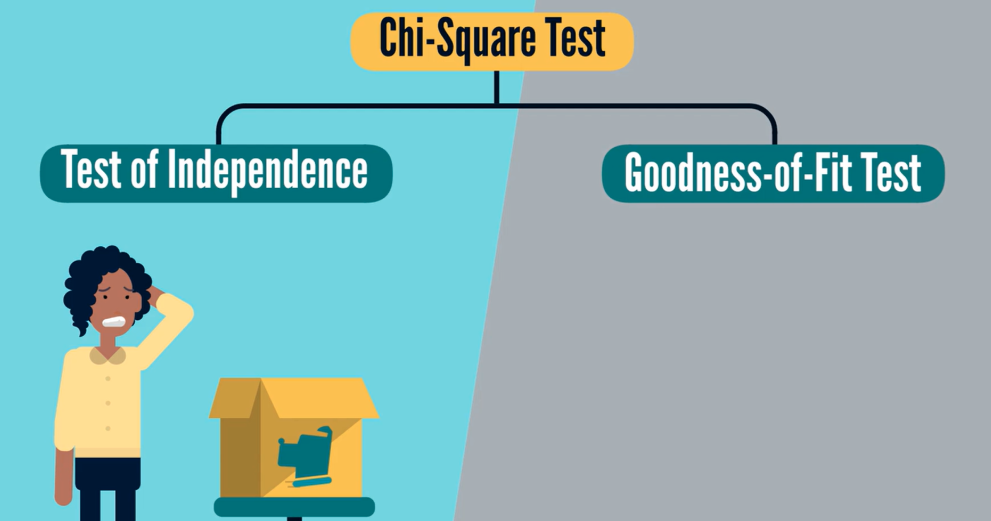

Here, we need to perform the Chi-square Test of Independence.

### step - 4: Calculation 

In [10]:
stat, p, dof, expected = chi2_contingency(df_crosstab, correction=False)

In [11]:
print("Chi2:" + str(stat))
print("p-value:" + str(p))
print("Degree of Freedom:" + str(dof))
print("Expected Table:\n" + str(expected))

Chi2:21.388569942634078
p-value:0.1640533250506748
Degree of Freedom:16
Expected Table:
[[12.17973231 24.22562141 14.05353728  9.36902486 10.17208413]
 [48.71892925 96.90248566 56.21414914 37.47609943 40.68833652]
 [15.65965583 31.14722753 18.06883365 12.0458891  13.07839388]
 [ 8.6998088  17.3040153  10.03824092  6.69216061  7.26577438]
 [ 5.7418738  11.4206501   6.62523901  4.416826    4.79541109]]


In [12]:
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Uniqueness and Purchase Likelihood.")
else:
    print("Fail to reject the null hypothesis: No significant association.")

Fail to reject the null hypothesis: No significant association.


### Interpreting the Output
The p-value (0.1641) exceeds the pre-established alpha of 0.05. This leads us not to reject the null hypothesis—suggesting no significant link between the product packaging's distinctiveness and the likelihood of consumers purchasing it at a significance level of 0.05.